In [1]:
import pyvo as vo
import numpy as np
import scipy 
import matplotlib.pyplot as plt
import glob
from time import sleep
import astropy

In [2]:
#get a list of all the help fields from the folder names in DMU32
#the HELP dmu products can befound here https://github.com/H-E-L-P/dmu_products
dirlist = glob.glob('../../../HELP/dmu_products/dmu32/dmu32_*')
fields = []
for dir in dirlist:
    if ('dmu32_' in dir) == True and ('.ipynb' in dir)==False:
        fields.append(dir[39:])

In [3]:
fields

['AKARI-NEP',
 'AKARI-SEP',
 'Bootes',
 'CDFS-SWIRE',
 'COSMOS',
 'EGS',
 'ELAIS-N1',
 'ELAIS-N2',
 'ELAIS-S1',
 'GAMA-09',
 'GAMA-12',
 'GAMA-15',
 'HDF-N',
 'Herschel-Stripe-82',
 'Lockman-SWIRE',
 'NGP',
 'SA13',
 'SGP',
 'SPIRE-NEP',
 'SSDF',
 'XMM-13hr',
 'XMM-LSS',
 'xFLS']

In [4]:
#setup a connection to the HELP VO server at Sussex
service = vo.dal.TAPService("https://herschel-vos.phys.sussex.ac.uk/__system__/tap/run/tap")

In [5]:
done_fields = []

In [6]:
#loop over every field and send an SQL like query to the VO asking for every source with a CIGALE SED
#This may fail due to errors server side. If that happens you can rerun this cell and it will skip fields 
#which have already been completed
for n,field in enumerate(fields):
    print(n)
    if field in done_fields:
        continue
    #if field == 'Herschel-Stripe-82':
    #    continue
    print(field)
    query = """
        SELECT *
        FROM herschelhelp.main
        WHERE (
        herschelhelp.main.field = '{}' AND
        herschelhelp.main.cigale_dustlumin>0
        )
        """.format(field)#,(3.8*10**26*10**13))
    try:
        job = service.submit_job(query)
        job.run()
    
        while job.phase == "EXECUTING":
            print("Job running")
            sleep(5)
        print('job finsihed')        

        if n==0:
            table = job.fetch_result().to_table()
            print('table created with {} rows'.format(len(table)))
        else:
            result = job.fetch_result().to_table()
            table = astropy.table.vstack([result,table],join_type='outer')
            print('table editied, added {} rows'.format(len(result)))

        done_fields.append(field)
    except:
        print('VO call failed')
    job.delete()

0
AKARI-NEP
Job running
job finsihed


1
AKARI-SEP
Job running
job finsihed
table editied, added 0 rows
2
Bootes
Job running
Job running
Job running
Job running
Job running
job finsihed


table editied, added 0 rows
3
CDFS-SWIRE
Job running
Job running
Job running
Job running
Job running
job finsihed


table editied, added 9308 rows
4
COSMOS
Job running
Job running
Job running
Job running
Job running
Job running
Job running
Job running
Job running
job finsihed


table editied, added 15747 rows
5
EGS
Job running
Job running
job finsihed


table editied, added 0 rows
6
ELAIS-N1
Job running
Job running
Job running
Job running
Job running
Job running
Job running
Job running
Job running
Job running
Job running
Job running
Job running
Job running
Job running
job finsihed


table editied, added 50129 rows
7
ELAIS-N2
Job running
Job running
job finsihed


table editied, added 0 rows
8
ELAIS-S1
Job running
Job running
Job running
Job running
Job running
Job running
Job running
job finsihed


table editied, added 25393 rows
9
GAMA-09
Job running
Job running
Job running
Job running
Job running
Job running
Job running
Job running
Job running
Job running
Job running
Job running
Job running
Job running
Job running
Job running
Job running
Job running
Job running
Job running
Job running
Job running
Job running
Job running
Job running
Job running
Job running
Job running
Job running
Job running
Job running
Job running
Job running
Job running
Job running
Job running
Job running
Job running
Job running
job finsihed


table editied, added 130293 rows
10
GAMA-12
Job running
Job running
Job running
Job running
Job running
Job running
Job running
Job running
Job running
Job running
Job running
Job running
Job running
Job running
Job running
Job running
VO call failed
11
GAMA-15
Job running
Job running
Job running
Job running
Job running
Job running
Job running
Job running
Job running
Job running
Job running
Job running
Job running
Job running
Job running
Job running
Job running
Job running
Job running
Job running
Job running
Job running
Job running
Job running
Job running
Job running
Job running
Job running
Job running
Job running
Job running
Job running
Job running
Job running
Job running
Job running
Job running
job finsihed


table editied, added 117234 rows
12
HDF-N
Job running
job finsihed


table editied, added 0 rows
13
Herschel-Stripe-82
Job running
Job running
Job running
Job running
Job running
Job running
Job running
Job running
Job running
Job running
Job running
Job running
Job running
Job running
Job running
Job running
Job running
Job running
Job running
Job running
Job running
Job running
Job running
Job running
Job running
Job running
Job running
Job running
Job running
Job running
Job running
Job running
Job running
Job running
Job running
Job running
Job running
Job running
Job running
job finsihed


table editied, added 0 rows
14
Lockman-SWIRE
Job running
job finsihed


table editied, added 0 rows
15
NGP
Job running
Job running
Job running
Job running
Job running
Job running
job finsihed


table editied, added 0 rows
16
SA13
Job running
job finsihed


table editied, added 0 rows
17
SGP
Job running
job finsihed


table editied, added 0 rows
18
SPIRE-NEP
Job running
job finsihed


table editied, added 0 rows
19
SSDF
Job running
Job running
Job running
Job running
Job running
Job running
Job running
Job running
Job running
Job running
job finsihed


table editied, added 0 rows
20
XMM-13hr
Job running
job finsihed


table editied, added 0 rows
21
XMM-LSS
Job running
Job running
Job running
Job running
Job running
Job running
Job running
Job running
Job running
Job running
job finsihed


table editied, added 0 rows
22
xFLS
Job running
Job running
job finsihed


table editied, added 0 rows


In [8]:
#make your cuts on the data to select only the most luminous sources
mask = table['cigale_dustlumin']>3.8*10**26*10**13
table[mask]

<Table masked=True length=1968>
  field              help_id           ... flag_optnir_obs flag_optnir_det
                                       ...                                
  object              object           ...      int16           int16     
---------- --------------------------- ... --------------- ---------------
   GAMA-15 HELP_J140739.985-014037.610 ...               3               3
   GAMA-15 HELP_J140613.147-004508.205 ...               3               3
   GAMA-15 HELP_J141201.545-013005.483 ...               3               3
   GAMA-15 HELP_J141004.300-010844.553 ...               3               3
   GAMA-15 HELP_J141001.067-010625.781 ...               3               3
   GAMA-15 HELP_J141247.204-011148.817 ...               3               3
   GAMA-15 HELP_J140908.535-000851.819 ...               3               3
   GAMA-15 HELP_J140956.814-000731.754 ...               3               3
   GAMA-15 HELP_J141251.446-001003.839 ...               3               3
       ...                         ... ...             ...             ...
    COSMOS HELP_J100209.648+023632.549 ...               3               3
    COSMOS HELP_J100224.785+023211.522 ...               3               3
    COSMOS HELP_J100240.646+020629.881 ...               3               3
    COSMOS HELP_J100310.393+022706.479 ...               3               3
    COSMOS HELP_J100252.637+024159.123 ...               3               3
    COSMOS HELP_J100306.119+024714.786 ...               3               3
CDFS-SWIRE HELP_J032813.230-290058.015 ...               7               7
CDFS-SWIRE HELP_J033304.425-291556.818 ...               7               7
CDFS-SWIRE HELP_J033501.915-291559.510 ...               7               7
CDFS-SWIRE HELP_J033715.526-275330.284 ...               7               7

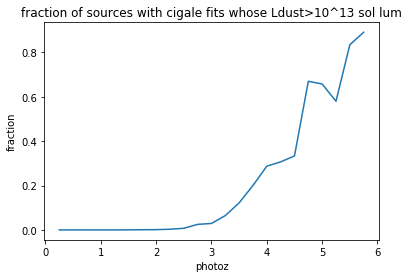

total number of sources with Ldust>10^13 solar luminosities is 1968
total number of sources with Ldust>10^13 solar luminosities and a spectoscopic redshift is 40


In [17]:
#showing the fraction of all sources with a cigale fit whose dust luminosity is over 10^13 solar luminosities
bins = np.arange(0,6,0.25)
photz = table['redshift']
allz,_ = np.histogram(photz,bins=bins)

mask = table['cigale_dustlumin']>3.8*10**26*10**13
photz = table['redshift'][mask]
brightz,_ = np.histogram(photz,bins=bins)

plt.plot(bins[:-1]+0.25,(brightz/allz))

plt.xlabel('photoz')
plt.ylabel('fraction')
plt.title('fraction of sources with cigale fits whose Ldust>10^13 sol lum')
plt.show()
print('total number of sources with Ldust>10^13 solar luminosities is {}'.format(np.sum(mask)))

mask = mask & (~np.isnan(table['zspec']))
print('total number of sources with Ldust>10^13 solar luminosities and a spectoscopic redshift is {}'.format(np.sum(mask)))

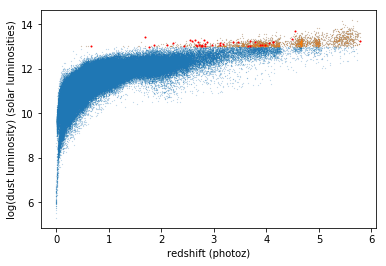

In [33]:
x = table['redshift']
y = np.log10(table['cigale_dustlumin']/(3.8*10**26))
plt.scatter(x,y,s=0.01)

mask = table['cigale_dustlumin']>3.8*10**26*10**13
x = table['redshift'][mask]
y = np.log10(table['cigale_dustlumin']/(3.8*10**26))[mask]
plt.scatter(x,y,s=0.01)

mask = (table['cigale_dustlumin']>3.8*10**26*10**13) & (~np.isnan(table['zspec']))
x = table['redshift'][mask]
y = np.log10(table['cigale_dustlumin']/(3.8*10**26))[mask]
plt.scatter(x,y,s=1,color='red')

plt.xlabel('redshift (photoz)')
plt.ylabel('log(dust luminosity) (solar luminosities)')
plt.show()

The above plot is colour coded as such, orange sources have a solar luminosity above 10^13 and the red sources are these luminous sources whose redshift was determined spectroscopically

In [32]:
mask = (table['cigale_dustlumin']>3.8*10**26*10**13) & (~np.isnan(table['zspec']))
table[mask]['ra','dec','zspec','cigale_dustlumin'].write('../data/ULIRG_HELP_zspec.csv',format='csv')

In [31]:
table[mask]['ra','dec','zspec','cigale_dustlumin']

ra,dec,zspec,cigale_dustlumin
deg,deg,,W
float64,float64,float32,float64
212.517916710698,-1.14570921359686,2.97783,4.68667873658793e+39
215.138576688326,-0.542634620390696,2.70268,4.05460404457756e+39
216.192060895605,-1.2524715990345,3.65721,6.13311660231036e+39
218.671920735512,-1.76354551578337,2.50559,7.21706461705536e+39
218.141560816895,-1.36259894779744,0.520141,3.86912871144186e+39
221.119287070439,-1.39556934472614,4.19605,6.51854660435849e+39
221.91609809789,-1.48884075057231,1.2207,4.35296843956537e+39
222.627259309823,-1.43272031422287,1.59691,6.23267381465901e+39
